In [1]:
## Load relevant R packages.

inLibraries = list('repr','spdep','raster','rgdal','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}

##  Resize plot area.

options(repr.plot.width=6, repr.plot.height=6)

In [7]:
meteorites <- read.csv("data/results/meteorites.csv")

head(meteorites)

coordinates(meteorites)<-~longitude+latitude

writeOGR(meteorites, "data/results/", "meteorites_sf", driver = "ESRI Shapefile")




hist_urban <- readOGR("data/results", "hist_urban")

head(hist_urban)



,X,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation,group_name,Chondrite.Achondrite,type,L3,L4
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5625,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",L,Chondrite,Stony,Ordinary,L
2,568,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",H,Chondrite,Stony,Ordinary,H
3,916,Abajo,4,Valid,H5,331,Found,1982,26.80000,-105.41667,"(26.8, -105.41667)",H,Chondrite,Stony,Ordinary,H
4,918,Abbott,5,Valid,H3-6,21100,Found,1951,36.30000,-104.28333,"(36.3, -104.28333)",H,Chondrite,Stony,Ordinary,H
5,399,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",EH,Chondrite,Stony,Enstatite,EH-EL
6,6004,Abernathy,7,Valid,L6,2914,Found,1941,33.85000,-101.80000,"(33.85, -101.8)",L,Chondrite,Stony,Ordinary,L


Warning message in writeOGR(meteorites, "data/results/", "meteorites_sf", driver = "ESRI Shapefile"):
“Field names abbreviated for ESRI Shapefile driver”


OGR data source with driver: ESRI Shapefile 
Source: "/Volumes/Marble/Users/mwy/Documents/PSDS/capstone/data/results", layer: "hist_urban"
with 10352 features
It has 8 fields


,Record,City,OtherName,Country,Certainty,year,pop,cityid
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,1,Eridu,NA,Iraq,1,-3700,6000,Eridu_30.8_46
2,2,Eridu,NA,Iraq,1,-3500,10000,Eridu_30.8_46
3,3,Larak,Kesh,Iraq,1,-3500,10000,Larak_32.3_45.7
4,4,Uruk,Erech,Iraq,1,-3500,14000,Uruk_31.3_45.6
5,5,Anshan,NA,Iran,1,-3300,10000,Anshan_30_52.4
6,6,Eridu,NA,Iraq,1,-3300,10000,Eridu_30.8_46


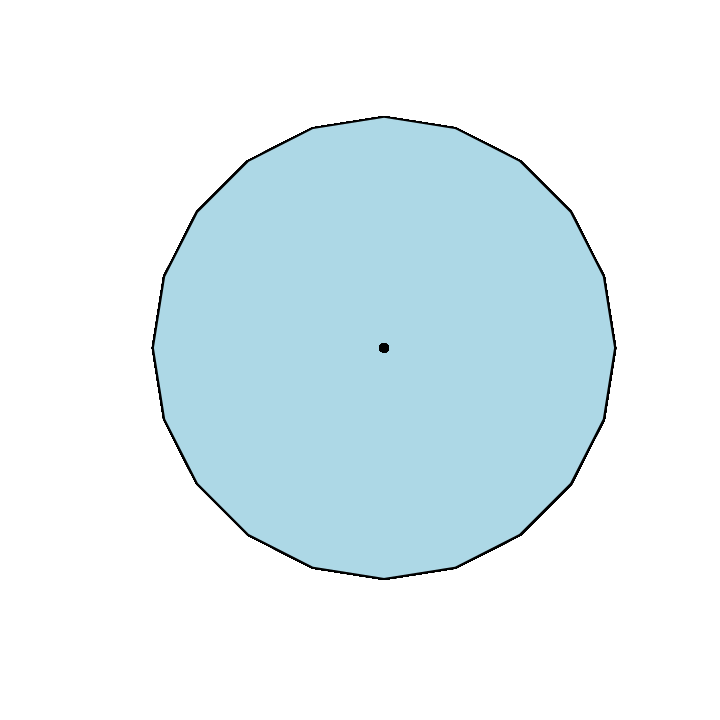

In [9]:
## Determining urban areas within 50 miles of a meteorite.

meteorites.buf <- gBuffer(meteorites, byid=TRUE, id=NULL, width = (50*5280/3.281),quadsegs=5, capStyle="ROUND", joinStyle="ROUND", mitreLimit=1.0)

plot(meteorites.buf,col='lightblue')
plot(meteorites,pch=20,add=TRUE)


In [11]:
meteorites.buf@data

,X,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,GeoLocation,group_name,Chondrite.Achondrite,type,L3,L4
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5625,Aachen,1,Valid,L5,21.0,Fell,1880,"(50.775, 6.08333)",L,Chondrite,Stony,Ordinary,L
2,568,Aarhus,2,Valid,H6,720.0,Fell,1951,"(56.18333, 10.23333)",H,Chondrite,Stony,Ordinary,H
3,916,Abajo,4,Valid,H5,331.0,Found,1982,"(26.8, -105.41667)",H,Chondrite,Stony,Ordinary,H
4,918,Abbott,5,Valid,H3-6,21100.0,Found,1951,"(36.3, -104.28333)",H,Chondrite,Stony,Ordinary,H
5,399,Abee,6,Valid,EH4,107000.0,Fell,1952,"(54.21667, -113.0)",EH,Chondrite,Stony,Enstatite,EH-EL
6,6004,Abernathy,7,Valid,L6,2914.0,Found,1941,"(33.85, -101.8)",L,Chondrite,Stony,Ordinary,L
7,919,Abo,8,Valid,H,1.2,Found,1840,"(60.43333, 22.3)",H,Chondrite,Stony,Ordinary,H
8,920,Abu Moharek,9,Valid,H4,4500.0,Found,1997,"(27.23944, 29.83583)",H,Chondrite,Stony,Ordinary,H
9,0,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,"(16.88333, -99.9)",Acapulcoite,Achondrite,Stony,Primitive,-
